In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import tree
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target

# Arrange Data into Features Matrix and Target Vector
X = df.loc[:, df.columns != 'species']
y = df.loc[:, 'species'].values

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0)

# Random Forests in `scikit-learn` (with N = 100)
rf = RandomForestClassifier(n_estimators=100,
                            random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

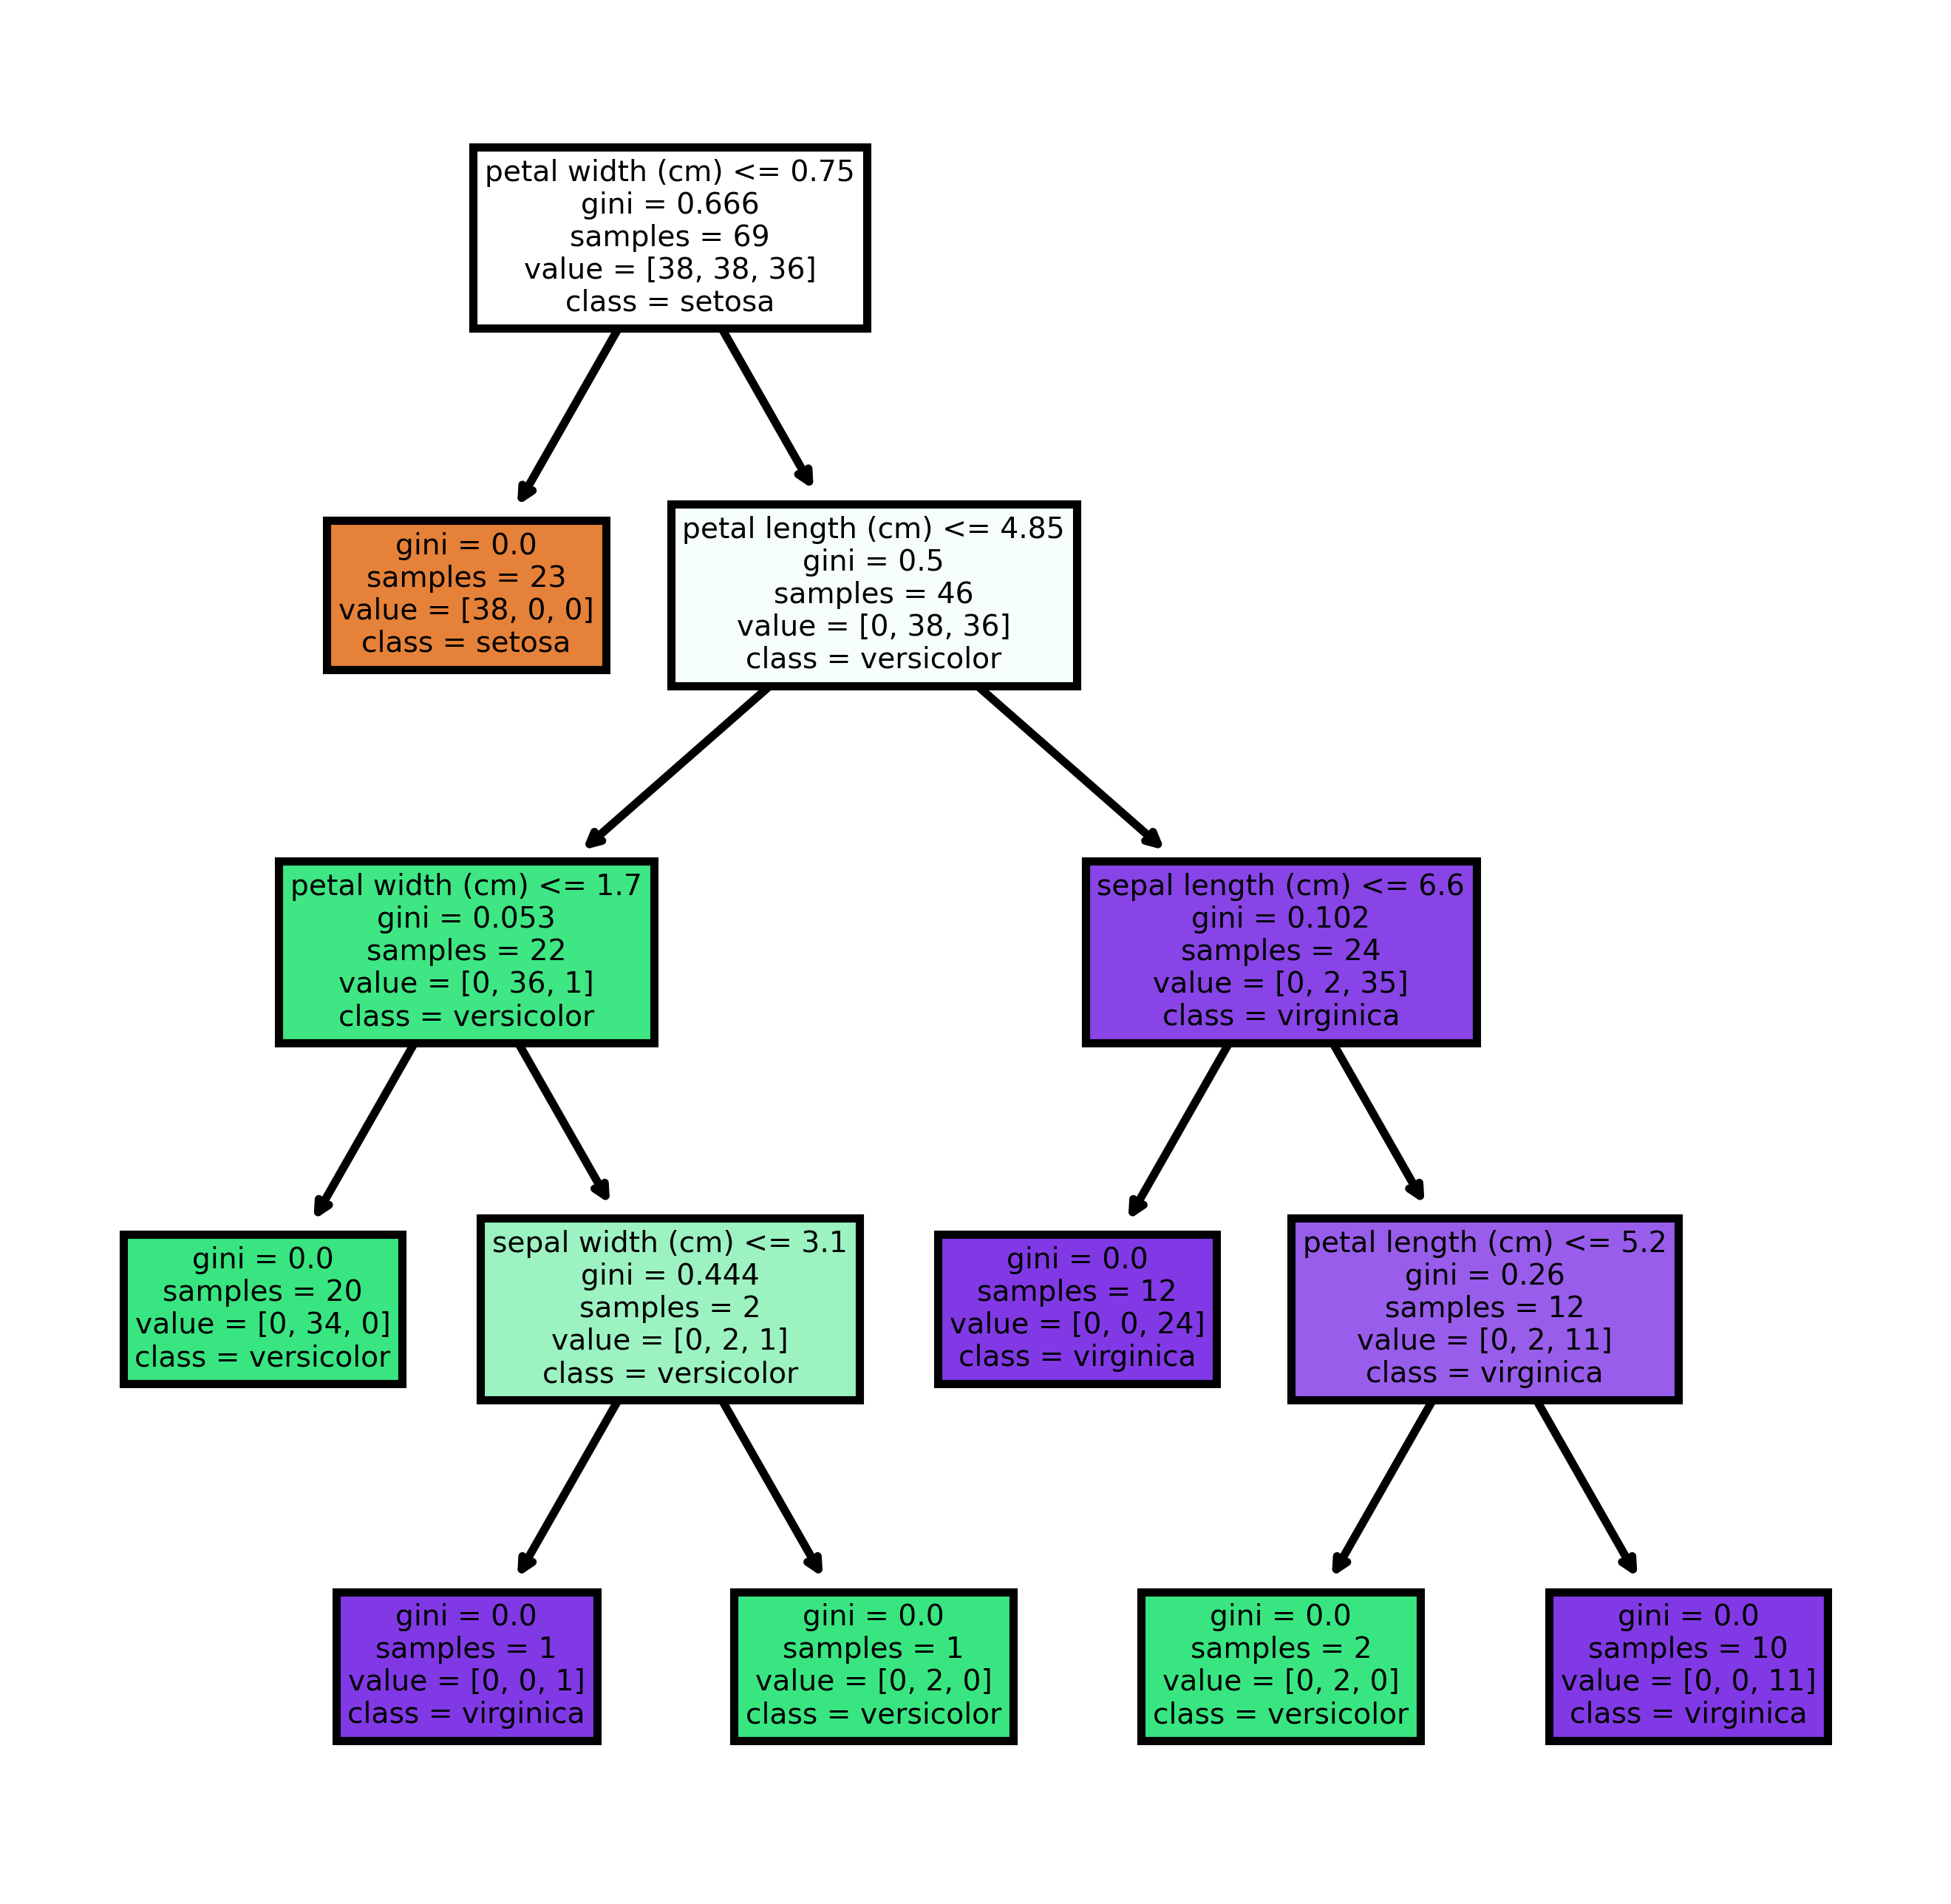

In [5]:
fn=data.feature_names
cn=data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

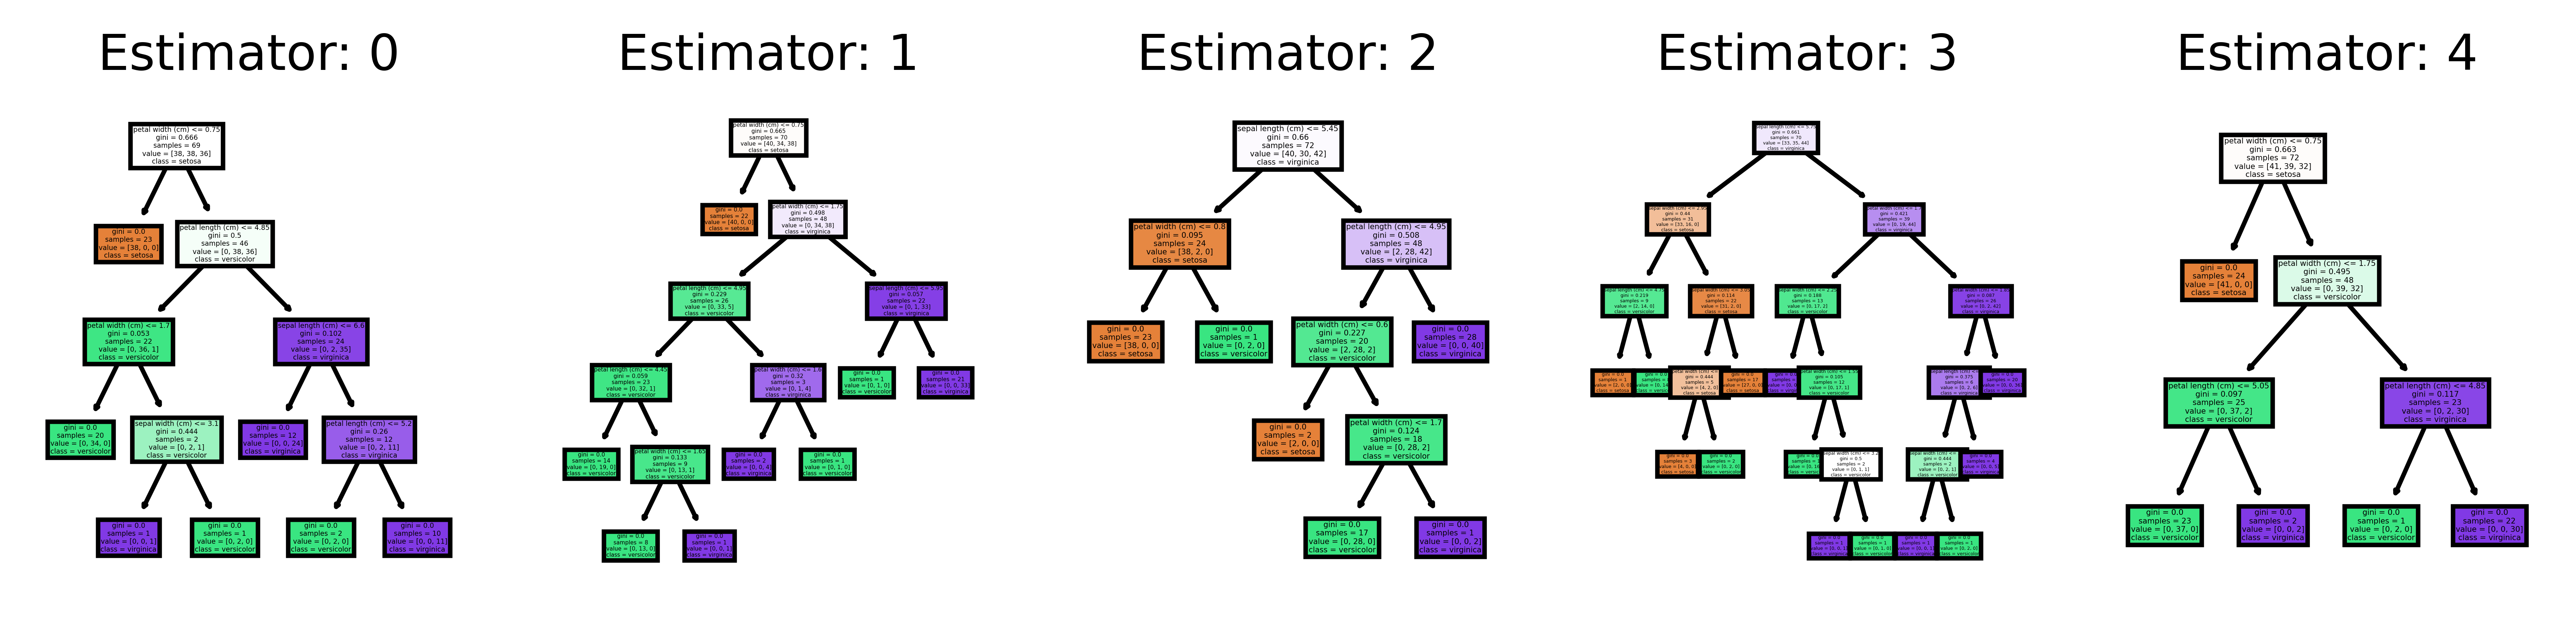

In [6]:
# This may not the best way to view each estimator as it is small
fn=data.feature_names
cn=data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')